In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import functions as fn
import box
import halo
import my_rc_params

In [2]:
z = 0
xBins = np.logspace(-2, 0, 21)
mBins = np.logspace(10.5, 14.0, 11)
k = np.logspace(-1, 2, 30)

In [3]:
x = np.sqrt(xBins[:-1]*xBins[1:])
m = np.sqrt(mBins[:-1]*mBins[1:])
logm = np.log10(m)

In [6]:
box = box.Box(fn.BOX_PATH, fn.SHOT[z])

In [8]:
df = pd.read_csv(fn.HERE_PATH/'Density_Profiles'/f'zooms_z{z}.csv')
halo_mass = np.array(df.iloc[:,1])

halo_density = np.array(df.iloc[:, 2:-1])
halo_r200c = np.array(df.iloc[:,-1])
pos = np.array([0,0,0])
halos = [halo.Halo(pos, r200c) for r200c in halo_r200c]
for i, halo in enumerate(halos):
    halo.mass = halo_mass[i]
    halo.density = halo_density[i,:]

[[<matplotlib.lines.Line2D at 0x7f5b1e650590>],

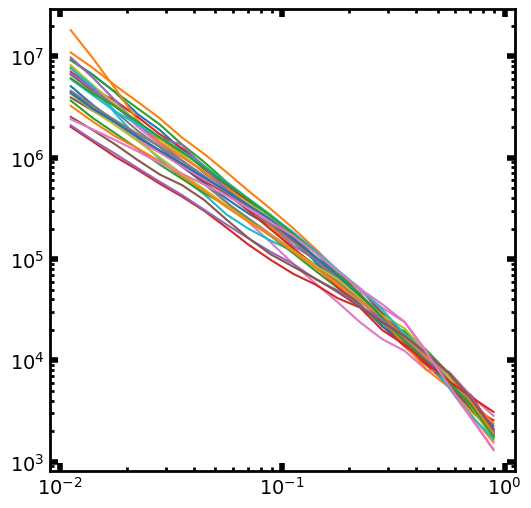

In [9]:
[plt.loglog(x, halo.density) for halo in halos]

In [ ]:
avg_halos, no_halos = fn.get_mass_avg_density(halos, xBins, mBins)
for i, n in enumerate(no_halos):
    print(f'{n} in {logm[i]}')

0.0 in 10.674999999999999
0.0 in 11.024999999999999
0.0 in 11.375
0.0 in 11.725
0.0 in 12.075000000000001
0.0 in 12.425
0.0 in 12.775
3.0 in 13.125
3.0 in 13.475000000000001
5.0 in 13.825


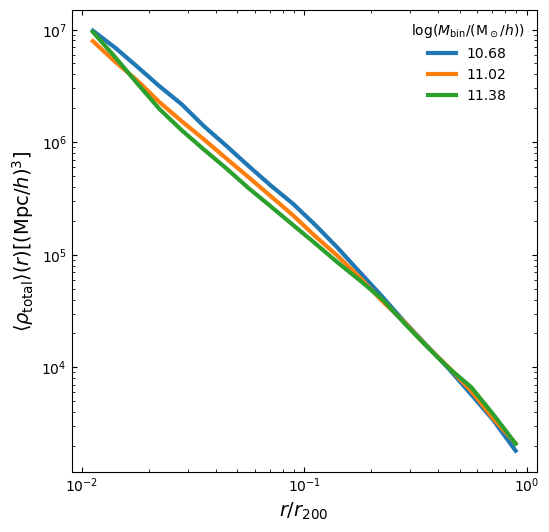

In [ ]:
fg, ax = plt.subplots()
ax.loglog()
ax.set_xlabel(r'$r/r_{200}$')
ax.set_ylabel(r'$\langle\rho_\mathrm{total}\rangle(r)[(\mathrm{Mpc}/h)^3]$')
for i, halo in enumerate(avg_halos):
    ax.plot(x, halo.density, linewidth=3, label=round(logm[i],2))
ax.legend(title='$\log(M_\mathrm{bin}/(\mathrm{M}_\odot/h))$')

In [ ]:
[halo.get_u(x, k) for halo in avg_halos]

[None, None, None]

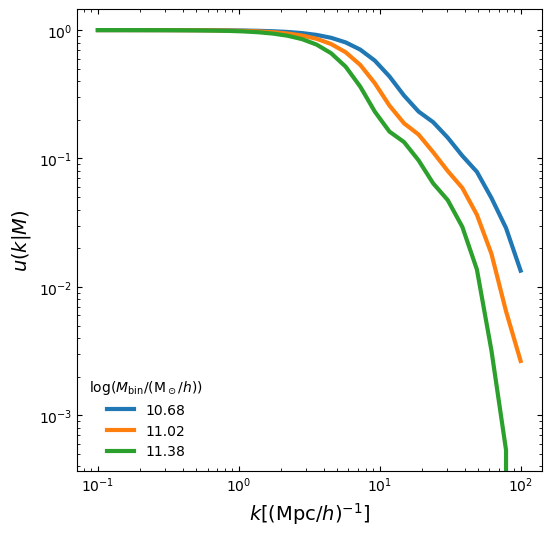

In [ ]:
fg2, ax2 = plt.subplots()
ax2.loglog()
ax2.set_xlabel(r'$k[(\mathrm{Mpc}/h)^{-1}]$')
ax2.set_ylabel(r'$u(k|M)$')
for i, halo in enumerate(avg_halos):
    ax2.plot(k, halo.u, linewidth=3, label=round(logm[i],2))
ax2.legend(title='$\log(M_\mathrm{bin}/(\mathrm{M}_\odot/h))$')

In [ ]:
P_1h = fn.get_power(box, avg_halos, k, mBins, z, no_halos)

3


/data/ERCblackholes4/eac83/FABLE_S8/functions.py:39: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  hist = np.array(np.histogram(mass, bins=m))


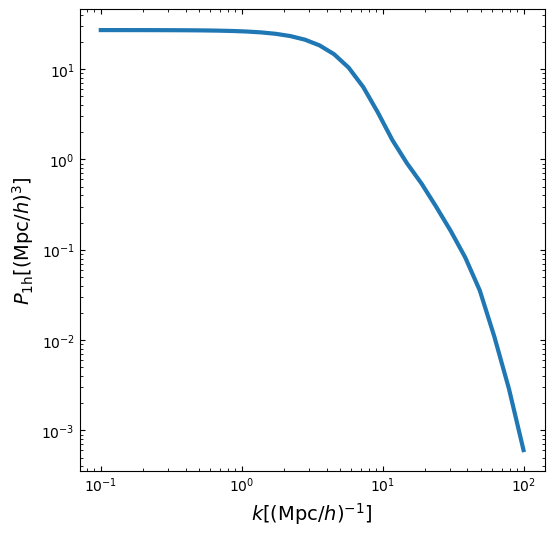

In [ ]:
fg3, ax3 = plt.subplots()
ax3.loglog()
ax3.set_xlabel(r'$k[(\mathrm{Mpc}/h)^{-1}]$')
ax3.set_ylabel(r'$P_\mathrm{1h}[(\mathrm{Mpc}/h)^3]$')
ax3.plot(k, P_1h, linewidth=3)

In [ ]:
with open(fn.here_path/'Power_Spectra'/f'zoom_z{z}.csv', 'w') as f:
    header = 'k, P_1h \n'
    f.write(header)
    np.savetxt(f, np.c_[k, P_1h], delimiter=',')